In [1]:
import torch
from models import prompters
from torchvision import transforms
from torchvision.datasets import CIFAR100


In [2]:
PROMPT_SIZE = 30
IMAGE_SIZE  = 224
DEVICE = 'cuda'
class Args:
    def __init__(self):
        self.prompt_size = PROMPT_SIZE
        self.image_size = IMAGE_SIZE
        self.root       = './data'

In [3]:
path = "save/models/padding_30_cifar100_rn50-robust-eps8_sgd_lr_40_decay_0_bsz_128_trial_1/model_best.pth.tar"
ckpt = torch.load(path)

In [4]:
args = Args()
prompter = prompters.__dict__['padding'](args).to(DEVICE)


In [5]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                     std=[0.229, 0.224, 0.225])
    ])

train_dataset = CIFAR100(args.root, transform=preprocess,
                            download=True, train=True)

Files already downloaded and verified


In [6]:
image,_ = train_dataset.__getitem__(1)
image = image.to(DEVICE)
image = image.reshape(1,3,224,224)

In [7]:
image.shape

torch.Size([1, 3, 224, 224])

In [8]:
prompted_images = prompter(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


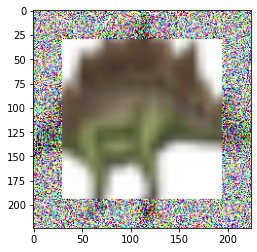

In [9]:
import matplotlib.pyplot as plt
plt.imshow(prompted_images[0,:,:,:].permute(1,2,0).detach().cpu().numpy())